#### I have now generated my object containing all my cleaned data, prior to hvg, saved as NR_cleandata.h5ad
##### This notebook will perform from hvg to integration on this object 


# Set up workspace:

In [1]:
#load packages I need
import os
import tools
import scanpy as sc
import pandas as pd
import dandelion as ddl
from tqdm import tqdm
import matplotlib.pyplot as plt
import scanpy.external as sce
from matplotlib.pyplot import rc_context

In [2]:
#show current directory 
os.getcwd()
os.chdir('/scratch/user/s4436039/scdata/Python_Integration_Sep')
os.getcwd()

'/scratch/user/s4436039/scdata/Python_Integration_Sep'

Print software versions:

In [3]:
sc.logging.print_header()

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.14.0 pandas==2.2.2 scikit-learn==1.5.0 statsmodels==0.14.2 igraph==0.11.5 pynndescent==0.5.12


In [4]:
ddl.logging.print_header()

dandelion==0.3.8 pandas==2.2.2 numpy==1.26.4 matplotlib==3.9.2 networkx==3.3 scipy==1.14.0


Set plotting parameters

In [5]:
sc.settings.set_figure_params(dpi=80, facecolor="white")

In [6]:
#read in data
NR_clean = sc.read_h5ad("NR_cleandata.h5ad") 

# pre-hvg to integration of NR_clean

In [7]:
NR_clean

AnnData object with n_obs × n_vars = 498382 × 15074
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'log1p'

### Identify highly variable genes

In [8]:
# (Expects logarithimised data)
sc.pp.highly_variable_genes(NR_clean, min_mean=0.0125, max_mean=3, min_disp=0.5)
NR_clean

AnnData object with n_obs × n_vars = 498382 × 15074
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [9]:
#set hidden slot
NR_clean.raw = NR_clean

In [10]:
#to get number of HV genes
print(NR_clean.var.highly_variable.sum())

1268


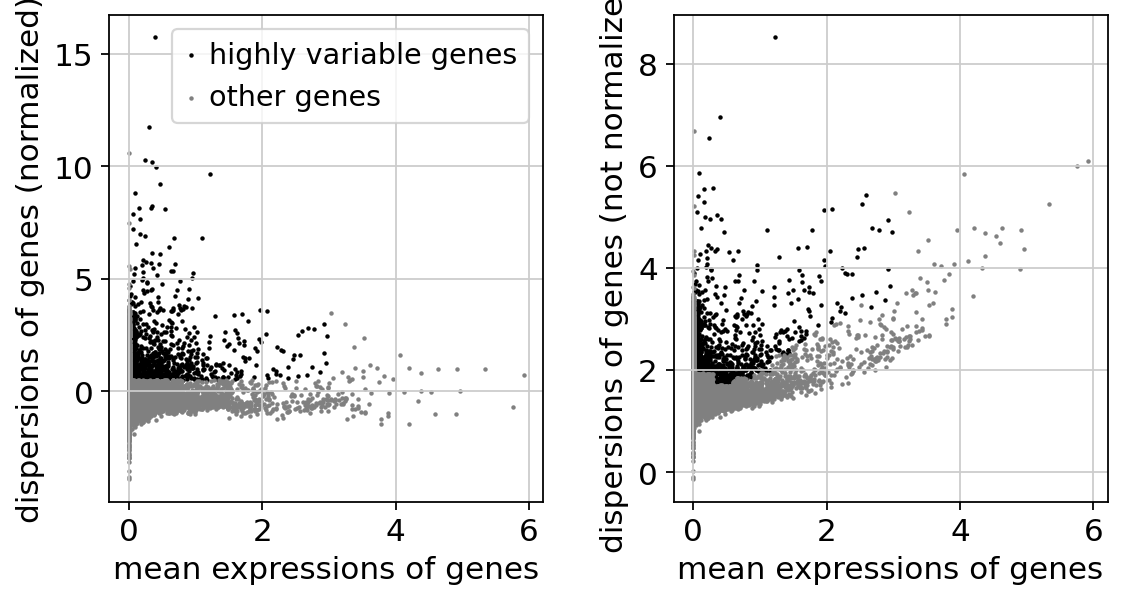

In [11]:
#plot out the number of highly variable genes
sc.pl.highly_variable_genes(NR_clean)

### Regress out necessary factors and perform scaling:

In [12]:
# Actually do the filtering for PCA
NR_clean = NR_clean[
    :, NR_clean.var.highly_variable
].copy()  # all rows/indexes : columns only selecting for those within high_variable, and then making a copy of itself
NR_clean

AnnData object with n_obs × n_vars = 498382 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

#### Do regression: 

In [13]:
#Regress out total counts, %mt, cycling genes (10min)
sc.pp.regress_out(NR_clean, ["total_counts", "pct_counts_mt", 'S_score', 'G2M_score'])
sc.pp.scale(NR_clean, max_value=10)

In [14]:
NR_clean

AnnData object with n_obs × n_vars = 498382 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

### Perform PCA: 

In [15]:
## perform PCA, adjust number of PCs to calculate from default (50) to 60. (1mins)
sc.tl.pca(NR_clean, n_comps=60)

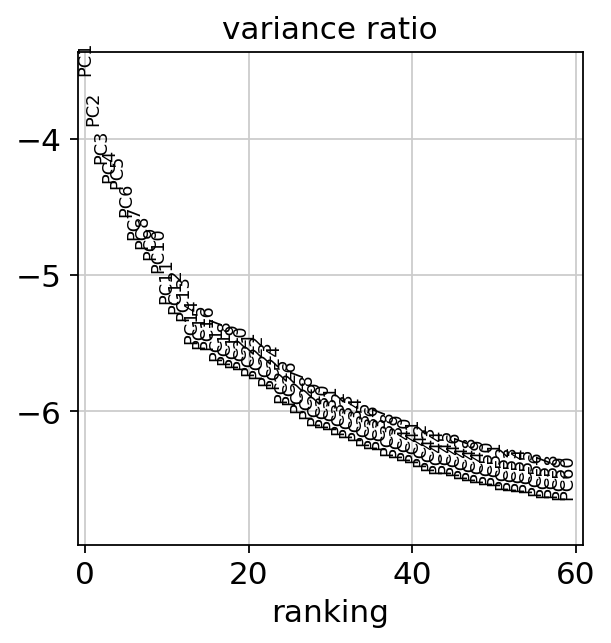

In [16]:
# make elbow plot to see variance contribution by each pc, choose inflection point
sc.pl.pca_variance_ratio(NR_clean, log=True, n_pcs=60)

### Export out the object that will be used for integration:

In [17]:
#at this point export out the object as the one we will use for integration (11min)
NR_clean.write_h5ad("NRclean_pre-int.h5ad", compression="gzip")

## Integration clean: 
#### want to perform integration after running PCA but before computing neighbor graph (perform on NRclean_pre-int.h5ad)

### Integration step was done by submitting a job. 

* Bashscript is named: _NR_bashscript-harmony-int.sh
* python script named: _NR-script-harmony-int.py

Ran with `sbatch _NR_bashscript-harmony-int.sh`

Bashscript: 
``` bash
#!/bin/bash
#SBATCH --nodes=1
#SBATCH --ntasks-per-node=1
#SBATCH --cpus-per-task=64
#SBATCH --mem=200G
#SBATCH --job-name=NR-IntegrationClean
#SBATCH --time=4:00:00
#SBATCH --partition=general
#SBATCH --account=a_kelvin_tuong
#SBATCH -o NR-IntegrationClean.output
#SBATCH -e NR-IntegrationClean.error

# export JAVA_CMD=/home/uqztuong/miniforge3/bin/java
source ~/.bashrc
mamba activate env
python3 _NR-script-harmony-int.py
```

Python script: 
``` python
import os
import tools
import scanpy as sc
import pandas as pd
import dandelion as ddl
from tqdm import tqdm
import matplotlib.pyplot as plt
import scanpy.external as sce

os.chdir('/scratch/user/s4436039/scdata/Python_Integration_Sep')

data_pre = sc.read_h5ad('/scratch/user/s4436039/scdata/Python_Integration_Sep/NRclean_pre-int.h5ad')

sce.pp.harmony_integrate(data_pre, 'integration_id', max_iter_harmony=200, verbose=True)

data_pre.write_h5ad("/scratch/user/s4436039/scdata/Python_Integration_Sep/NRclean_post-int.h5ad", compression="gzip")
```

### Converged after 3 iterations, took 1hr

# up to here 8th Nov 2024

## Read in data before/after integration:
* Perform neigborhood and UMAP on integrated and unintegrated data as a comparison:

In [ ]:
#read in data
data_pre = sc.read_h5ad('NRclean_pre-int.h5ad.h5ad')
data_post = sc.read_h5ad('NRclean_post-int.h5ad')

In [ ]:
data_pre.obsm

AxisArrays with keys: X_pca, X_pca_harmony

In [ ]:
data_post.obsm

In [ ]:
#check post int made new column with adjusted harmony PCs
'X_pca_harmony' in data_post.obsm

True

In [ ]:
#assign the new PCs to the standard PCA slot for post int
data_post.obsm['X_pca'] = data_post.obsm['X_pca_harmony']

### Neighborhood graph:

In [ ]:
## Computing neighbourhood graph - here UMAP
sc.pp.neighbors(data_pre, n_neighbors=10, n_pcs=60)

In [ ]:
## Computing neighbourhood graph - here UMAP
sc.pp.neighbors(data_post, n_neighbors=10, n_pcs=60)

### UMAP (~6min):

In [ ]:
sc.tl.umap(data_pre, min_dist=0.3)  # 0.3 is personal preference

In [ ]:
sc.tl.umap(data_post, min_dist=0.3)  # 0.3 is personal preference

# also colour by technology, once annotated will also colour by draft annotations, also colour by sex genes

### UMAP Visualisation:

In [ ]:
#visualise UMAP
with plt.rc_context({"figure.figsize": (6, 6)}):
    sc.pl.umap(
        data_pre,
        color=[
            "sample_type_major",
            "cancer_subtype",
            "dataset_id",
        ],
        ncols=1,
    )

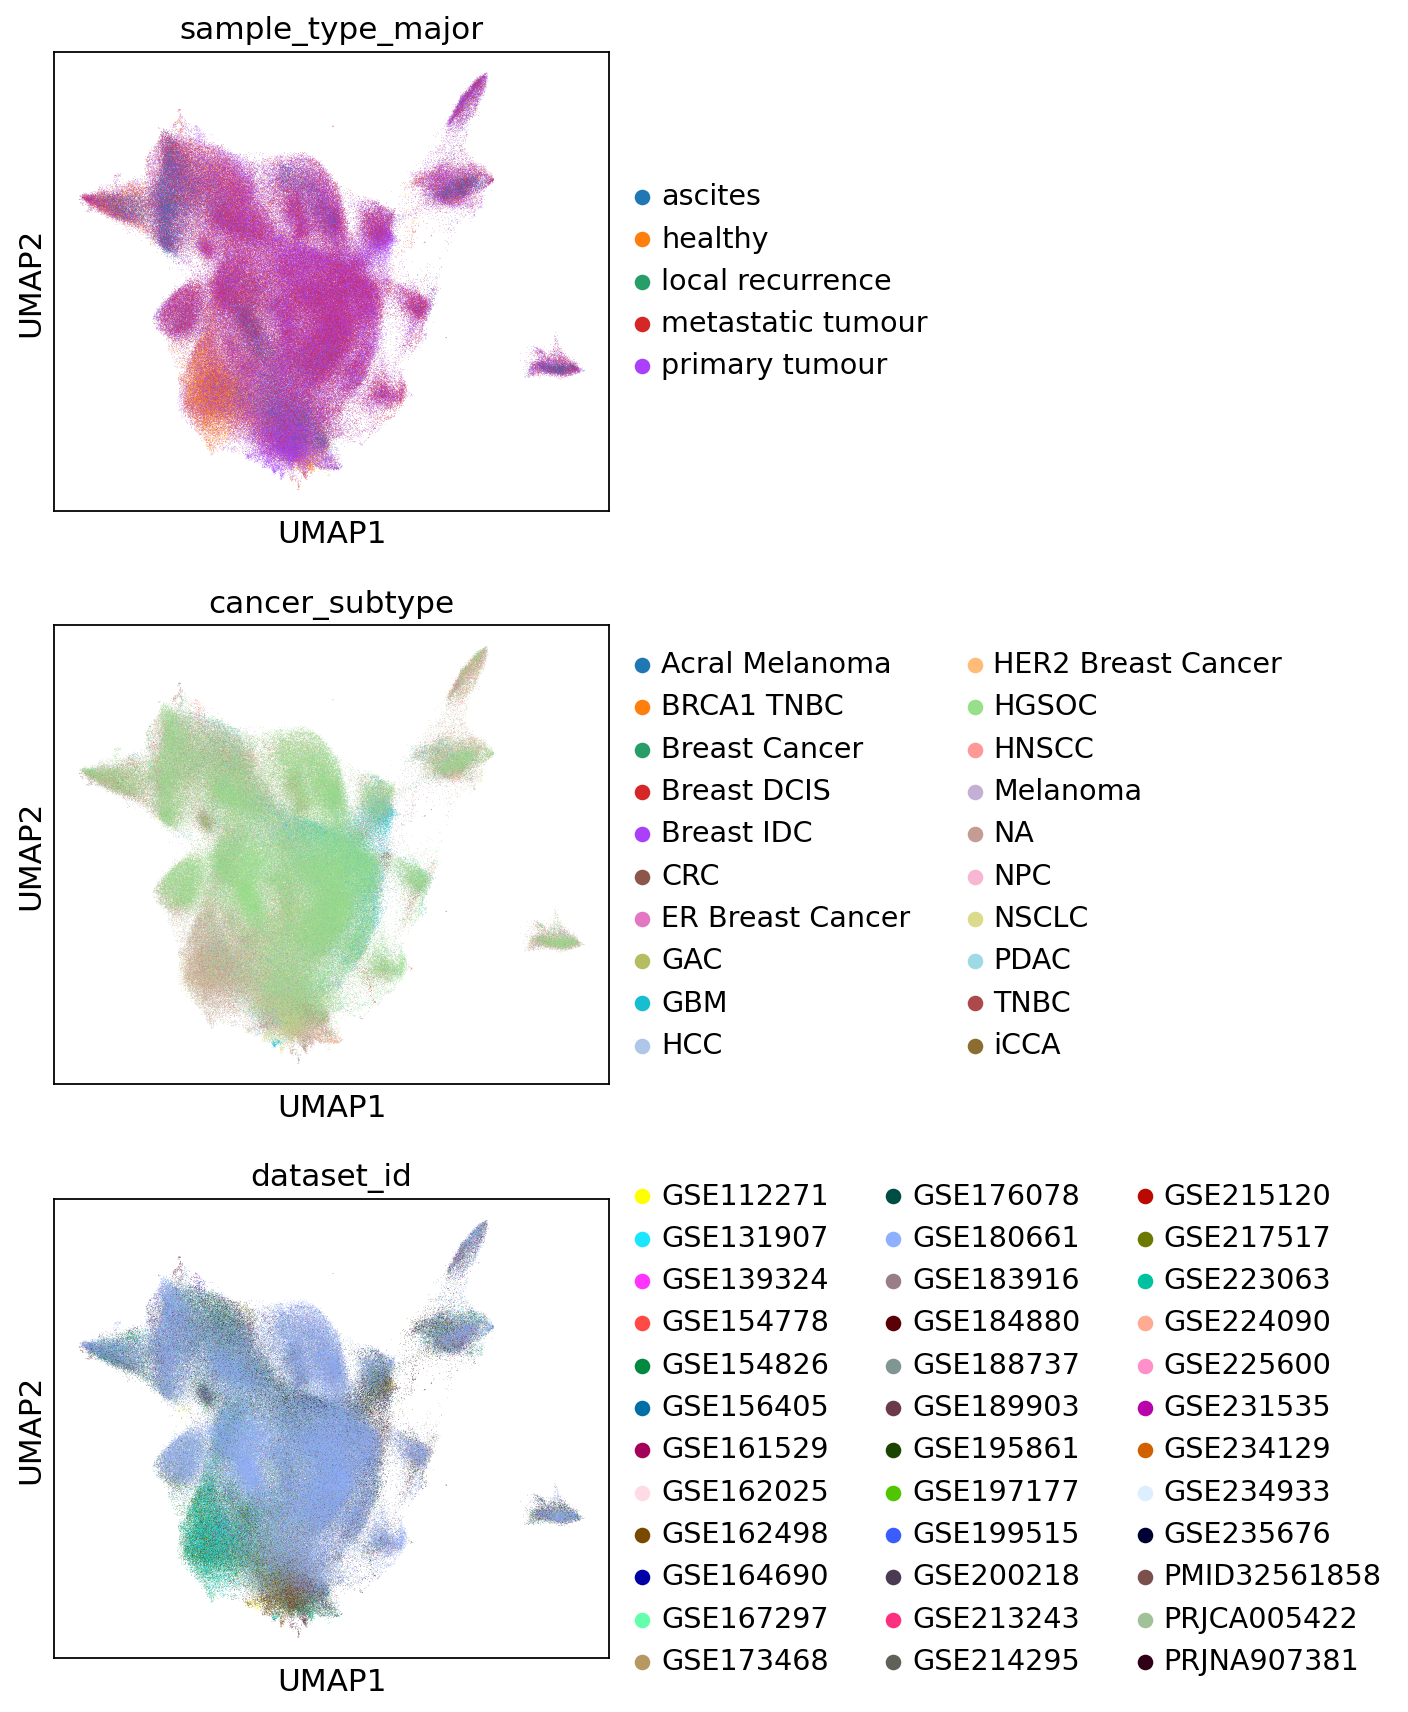

In [ ]:
#same as above 
#visualise UMAP --> can see now integrated
sc.pl.umap(
    data_post,
    color=[
        "sample_type_major",
        "cancer_subtype",
        "dataset_id",
    ],
    ncols=1,
)

In [ ]:
#export unintegrated and integrated object
data.write_h5ad("NRclean_integrated.h5ad", compression="gzip")